#  Project Overview

Group Members:
Maya Sandlin
Jake Umholtz
Robert Golden
Daniel Robles
Maanik Gupta

This notebook contains our project goals, data, methods, and results

# Business Understanding 

Computing Vision is a relative newcomer to the film production market, having little to no experience producing movies; for this reason, Computing Vision selected Deloitte to advise them on the creation of an initial, data-driven film production strategy.

Our measure of success was domestic Box Office revenue. We chose this metric because box office revenue is the first way film studios generate a cash flow. As a new movie studio, it is important for Computing Vision to start generating a cash flow as quickly and as largely as possible. Also, the production of films is an expensive endeavor, a successful box office performance can help recover the initial investments of creating a film. Box office revenue is also a good indicator of public sentiment as it indirectly measures how many people are physically going to watch the film in theaters. This serves as baseline check for future questioning regarding at home and digital release. 

With Box Office revenue as our primary indicator of success, we used data to answer the following question; what components of a film creates a box office hit? 

We quickly identified runtime, genre, and MPAA rating as foundational components for creating a box office hit. We identified these three components as they are the key drivers to reaching a large audience. If Computing Vision's films can capture a large audience, they have a higher probability of creating a box office hit, i.e. attract more people to pay to watch the film. 


# Data Understanding

We focused our analysis on the Rotten Tomatoes Movie Information dataset, known as the rt_movie_info spreadsheet as it contained the necessary box office, genre, and movie length information. 

We also used the The Numbers movie budget dataset to calculate the median movie budget as well as how many films had budgets at and above $100 million. This information supported our claim on why focusing on Box Office revenue is vital for Computing Vision.

# Data Preparation and Analysis

For each recommendation - genre, runtime, MPAA rating - we chose to drop the null values because the data set is large enough at over 1500 records to handle the loss of data. Also, much of the data set is highly varied, so using the mean or median would not be a fully accurate representation. 

Rationale: Import the necessary python libraries to perform analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Importing data and naming variables

In [2]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

Analysis for the median movie budget and for movies that had a budget at or above $100 million.

In [3]:
# checking for null values
print(tn_movie_budgets.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [4]:
# turning the budget into a string so it is easy to clean
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(str)

# removing commas, dollar signs, and white space
# turning the production budget back into an integer so calculations can be performed
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(' ', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

# calculating median
median_budget = tn_movie_budgets['production_budget'].median()

# counting the number of films with a production budget over $100 million
mill_budget = tn_movie_budgets[tn_movie_budgets['production_budget'] >= 100000000].count()

print(f'Median Production Budget: $ {median_budget}')

Median Production Budget: $ 17000000.0


In [5]:
print(f'Number of films with a budget that is >= $100 million: {mill_budget}')

Number of films with a budget that is >= $100 million: id                   406
release_date         406
movie                406
production_budget    406
domestic_gross       406
worldwide_gross      406
dtype: int64


## Genre

In [6]:
# segregating genre and box office from the dataset
movie_genre = rt_movie_info[['genre','box_office']]
# cleaning the segregated variables by dropping null values
clean_genre = movie_genre.dropna()
genres_sorted = movie_genre['genre'].sort_values().dropna()
genres_sorted.value_counts().head (30)
#using this data, the main six categories include: drama, comedy, horror, action, romance, and classics

#determining the average revenue

#drama
drama = clean_genre[clean_genre['genre'].str.contains('Drama')]
drama_revenue = drama ['box_office']
drama_revenue_clean = drama_revenue.dropna()
drama_avg_revenue = np.mean(drama_revenue_clean)
drama_med = np.mean(drama_revenue_clean)

#comedy
comedy = clean_genre[clean_genre['genre'].str.contains('Comedy')]
comedy_revenue = comedy ['box_office']
comedy_revenue_clean = comedy_revenue.dropna()
comedy_avg_revenue = np.mean(comedy_revenue_clean)
comedy_med = np.mean(comedy_revenue_clean)

#action 
action = clean_genre[clean_genre['genre'].str.contains('Action')]
action_revenue = action ['box_office']
action_revenue_clean = action_revenue.dropna()
action_avg_revenue = np.mean(action_revenue_clean)
action_med = np.mean(action_revenue_clean)

#horror
horror = clean_genre[clean_genre['genre'].str.contains('Horror')]
horror_revenue = horror ['box_office']
horror_revenue_clean = horror_revenue.dropna()
horror_avg_revenue = np.mean(horror_revenue_clean)
horror_med = np.mean(horror_revenue_clean)

#romance
romance = clean_genre[clean_genre['genre'].str.contains('Romance')]
romance_revenue = horror ['box_office']
romance_revenue_clean = romance_revenue.dropna()
romance_avg_revenue = np.mean(romance_revenue_clean)
romance_med = np.mean(romance_revenue_clean)

#classics
classics = clean_genre[clean_genre['genre'].str.contains('Classics')]
classic_revenue = classics ['box_office']
classic_revenue_clean = classic_revenue.dropna()
classic_avg_revenue = np.mean(classic_revenue_clean)
classic_med = np.mean(classic_revenue_clean)


## MPAA Rating

In [7]:
#made copy of df to drop Nan values and generate insights
movie_info = rt_movie_info.copy()

In [8]:
#drop records with nan values
movie_info = movie_info.dropna()

In [9]:
# turing box office into a string for cleaning
movie_info['box_office'] = movie_info['box_office'].astype(str)

In [10]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')

In [11]:
# making it so that we can sort and graph by the budget values
movie_info['box_office']=movie_info['box_office'].astype(float)

In [12]:
#a variable for each rating, narrowing down the table to that respective rating
R = movie_info[movie_info['rating']=='R']
PG = movie_info[movie_info['rating']=='PG']
PG13 = movie_info[movie_info['rating']=='PG-13']
G = movie_info[movie_info['rating']=='G']
NC17 = movie_info[movie_info['rating']=='NC17']
NR = movie_info[movie_info['rating']=='NR']

In [13]:
#new variables for the mean and median box office revenue
r=R['box_office'].mean()
rmed=R['box_office'].median()
pg=PG['box_office'].mean()
pgmed=PG['box_office'].median()
pg13=PG13['box_office'].mean()
pg13med=PG13['box_office'].median()
g=G['box_office'].mean()
gmed=G['box_office'].median()
nc17=NC17['box_office'].mean()
nc17med=NC17['box_office'].median()
nr=NR['box_office'].mean()
nrmed=NR['box_office'].median()

In [14]:
#this dictionary containing the mean variables will help with graphing
ratings_dict = {'R':r,'PG':pg,'PG-13':pg13,'G':g,'NC-17':nc17,'NR':nr}

In [15]:
#same as previous dictionary but for median variables
ratings_dict_med = {'R':rmed,'PG':pgmed,'PG-13':pg13med,'G':gmed,'NC-17':nc17med,'NR':nrmed}

## Runtime

In [16]:
# renaming variables for sake of clarity
rt_movie_info_runtime = rt_movie_info

In [17]:
# dropping null values
rt_movie_info_runtime = rt_movie_info.dropna()

box_office = []
for v in rt_movie_info_runtime['box_office'].dropna():
    box_office.append(box_office)

In [18]:
runtime_raw = [] #for freshly-extracted runtimes
runtime_clean = [] #for runtime w/o whitespace

for val in rt_movie_info_runtime['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)

#create new column 'runtime_clean'
rt_movie_info_runtime['runtime_clean'] = runtime_clean

<ipython-input-18-2b1f70847de7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_runtime['runtime_clean'] = runtime_clean


In [19]:
# creating new column for future analysis
rt_movie_info_runtime['box_office_clean'] = rt_movie_info_runtime['box_office']

# viewing dtypes in dataframe
rt_movie_info_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                235 non-null    int64  
 1   synopsis          235 non-null    object 
 2   rating            235 non-null    object 
 3   genre             235 non-null    object 
 4   director          235 non-null    object 
 5   writer            235 non-null    object 
 6   theater_date      235 non-null    object 
 7   dvd_date          235 non-null    object 
 8   currency          235 non-null    object 
 9   box_office        235 non-null    float64
 10  runtime           235 non-null    object 
 11  studio            235 non-null    object 
 12  runtime_clean     235 non-null    object 
 13  box_office_clean  235 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 27.5+ KB


<ipython-input-19-67149c2021ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_runtime['box_office_clean'] = rt_movie_info_runtime['box_office']


In [20]:
# changing objects to strings for further cleaning
rt_movie_info_runtime = rt_movie_info_runtime.astype(str)

# removing the comma from box office for easier future analysis
rt_movie_info_runtime['box_office_clean'].map(lambda x: float(x.replace(',', '')))

1         600000.0
6       41032915.0
7         224114.0
15       1039869.0
18      20518224.0
           ...    
1530    72700000.0
1537     1320005.0
1541    25335935.0
1542     1416189.0
1545       59371.0
Name: box_office_clean, Length: 235, dtype: float64

In [21]:
# changing box office back into a float for analysis 
rt_movie_info_runtime['box_office_clean'] = rt_movie_info_runtime['box_office_clean'].astype(float)

In [22]:
#create new dataframe
df2 = rt_movie_info_runtime[['runtime_clean','box_office_clean']].copy()

#ensure runtime valuse are recognized as integers
df2['runtime_clean'] = df2['runtime_clean'].astype(int)

#ensure box office slaes values are recognized as integers
df2['box_office_clean'] = df2['box_office_clean'].astype(int)

In [23]:
#Descriptive Stats for Runtime
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Descriptive Statistics for Runtime')
print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*2), '-',mean1+(std1*2))

print('') #for readability

#Descriptive Stats for Box Office Sales
mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Descriptive Statistics for Box Office Sales')
print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*2), '-', mean2+(std2*2222))

print('') #for readability
print('Correlation Coefficient')      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

#generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d1 = np.random.normal(mean1, std1, 235) 
#generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) 

df2more = df2[df2['runtime_clean'] > 105]
df2less = df2[df2['runtime_clean'] < 105]
print('')
print('Less - Runtime Mean:', df2less['runtime_clean'].mean(), 
      'Box Office Sales Mean:', df2less['box_office_clean'].mean(), 
      'n:', len(df2less))
print('More - Runtime Mean:', df2more['runtime_clean'].mean(),
      'Box Office Sales Mean:', df2more['box_office_clean'].mean(), 
      'n:', len(df2more))
#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

Descriptive Statistics for Runtime
Mean runtime: 106.66382978723404

Maximum runtime: 188
75th Percentile: 117.0
Median runtime: 105.0
25th Percentile: 93.0
Minimum runtime: 67
Interquartile Range: 24.0
Std. Dev. of runtime: 18.14712458129922
99.7% of observations should lay between: 70.3695806246356 - 142.95807894983247

Descriptive Statistics for Box Office Sales
Mean box office sales: 41958400.02127659

Maximum sales: 368000000
75th Percentile: 52649522.5
Median sales: 15536310.0
25th Percentile: 2302444.5
Minimum sales: 363
Std. Dev of Sales: 62630155.518367976
Interquartile Range: 50347078.0
99.7% of observations should lay between: -83301911.01545936 - 139206163961.8349

Correlation Coefficient
                  runtime_clean  box_office_clean
runtime_clean          1.000000          0.312157
box_office_clean       0.312157          1.000000

Less - Runtime Mean: 92.43103448275862 Box Office Sales Mean: 28014808.870689657 n: 116
More - Runtime Mean: 121.21929824561404 Box Office 

# Visualization

## Genre

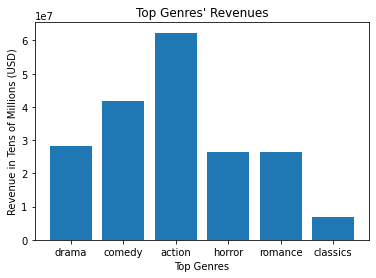

In [24]:
top_genre={"drama":drama_avg_revenue, "comedy":comedy_avg_revenue, "action":action_avg_revenue, 
           "horror": horror_avg_revenue, "romance":romance_avg_revenue, "classics": classic_avg_revenue}

#creating the graph to compare the top genres
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots()
# plt.ticklabel_format(style='plain')
ax.bar(top_genre.keys(),top_genre.values())



ax.set_title("Top Genres' Revenues")
ax.set_xlabel("Top Genres")
ax.set_ylabel("Revenue in Tens of Millions (USD)");

Text(0, 0.5, 'Median Revenue (USD)')

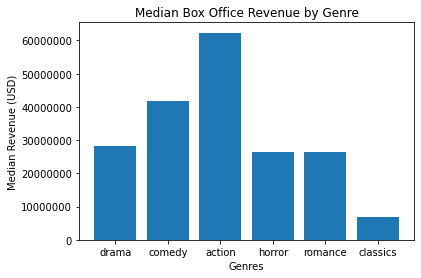

In [25]:
top_genre_med = {"drama":drama_med, "comedy":comedy_med, "action":action_med, 
           "horror": horror_med, "romance":romance_med, "classics": classic_med}

fig, ax = plt.subplots()
plt.ticklabel_format(style = 'plain')
ax.bar(top_genre_med.keys(),top_genre_med.values() )





ax.set_title("Median Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Median Revenue (USD)")

## MPAA Rating

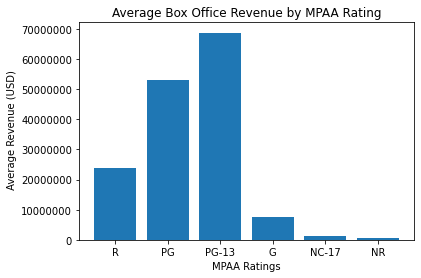

In [26]:
#Mean box office revenue by rating
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict.keys(),ratings_dict.values() )



ax.set_title("Average Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel(" Average Revenue (USD)");

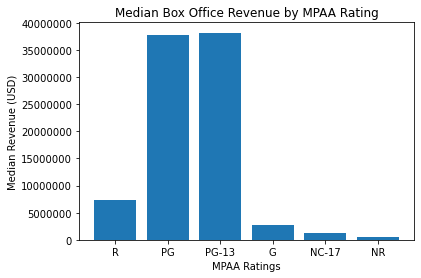

In [27]:
#median box office revenue by rating
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict_med.keys(),ratings_dict_med.values() )



ax.set_title("Median Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel("Median Revenue (USD)");

## Runtime

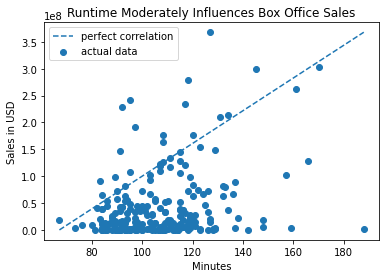

In [28]:
fig, ax = plt.subplots() #Generate Scatter plot 

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]




ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

# Statistical Communication

Conducted a one-tailed t-test to test the relationship between the action genre and box office performance

Null Hypothesis: The action genre has no effect on box office revenue
Alternative Hypothesis: Action films perform better in terms of box office revenue

In [29]:
# defining variables for t-test
pop=movie_info['box_office']
act=action['box_office']
alpha = .05

stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

(-1.6448536269514729, 1.6448536269514722)

In [30]:
stats.ttest_ind(act,pop)

Ttest_indResult(statistic=2.4041519619389393, pvalue=0.016792764209447402)

In [31]:
print(f' Pvalue of 0.0168 less than the alpha value of {alpha}')

 Pvalue of 0.0168 less than the alpha value of 0.05


We can reject the null hypothesis that the action genre has no effect on box office revenue, and conclude that the action genre is associated with an increase in box office revenue.

# Student Branches

## Maanik Gupta

## Maya Sandlin

In [ ]:
import pandas as pd
import numpy as np
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

movie_genre = rt_movie_info[['genre','box_office']]
clean_genre = movie_genre.dropna()
genres_sorted = movie_genre['genre'].sort_values().dropna()
genres_sorted.value_counts().head (30)
#using this data, the main six categories include: drama, comedy, horror, action, romance, and classics

#determining the average revenue

#drama
drama = clean_genre[clean_genre['genre'].str.contains('Drama')]
drama_revenue = drama ['box_office']
drama_revenue_clean = drama_revenue.dropna()
drama_avg_revenue = np.mean(drama_revenue_clean)
drama_avg_revenue

#comedy
comedy = clean_genre[clean_genre['genre'].str.contains('Comedy')]
comedy_revenue = comedy ['box_office']
comedy_revenue_clean = comedy_revenue.dropna()
comedy_avg_revenue = np.mean(comedy_revenue_clean)
comedy_avg_revenue 

#action 
action = clean_genre[clean_genre['genre'].str.contains('Action')]
action_revenue = action ['box_office']
action_revenue_clean = action_revenue.dropna()
action_avg_revenue = np.mean(action_revenue_clean)
action_avg_revenue 

#horror
horror = clean_genre[clean_genre['genre'].str.contains('Horror')]
horror_revenue = horror ['box_office']
horror_revenue_clean = horror_revenue.dropna()
horror_avg_revenue = np.mean(horror_revenue_clean)
horror_avg_revenue

#romance
romance = clean_genre[clean_genre['genre'].str.contains('Romance')]
romance_revenue = horror ['box_office']
romance_revenue_clean = romance_revenue.dropna()
romance_avg_revenue = np.mean(romance_revenue_clean)
romance_avg_revenue

#classics
classics = clean_genre[clean_genre['genre'].str.contains('Classics')]
classic_revenue = classics ['box_office']
classic_revenue_clean = classic_revenue.dropna()
classic_avg_revenue = np.mean(classic_revenue_clean)
classic_avg_revenue

top_genre={"drama":drama_avg_revenue, "comedy":comedy_avg_revenue, "action":action_avg_revenue, 
           "horror": horror_avg_revenue, "romance":romance_avg_revenue, "classics": classic_avg_revenue}

#creating the graph to compare the top genres
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots()
# plt.ticklabel_format(style='plain')
ax.bar(top_genre.keys(),top_genre.values())



ax.set_title("Top Genres' Revenues")
ax.set_xlabel("Top Genres")
ax.set_ylabel("Revenue in Tens of Millions (USD)")




## Robert Golden

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read CSVs for later use
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#print(movie_gross.info())
#Clean studio, domestic_gross, & foreign_gross
#movie_gross = movie_gross.dropna()
#movie_gross.info()

rt_movie_info = rt_movie_info.dropna()
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime 
ratings = []
for rating in rt_movie_info['rating'].dropna():
    ratings.append(rating)

runtime_raw = [] #for freshly-extracted runtimes
runtime_clean = [] #rfor runtime w/o whitespace
box_off_raw = [] #for raw box office sales data
box_off_clean = [] #for box office sales data without commas or whitespace
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)

#create new column 'runtime_clean'
rt_movie_info['runtime_clean'] = runtime_clean
#create new column 'box_office_clean'
rt_movie_info['box_office_clean'] = box_off_clean

#create new dataframe
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()
#ensure runtime valuse are recognized as integers
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
#ensure box office slaes values are recognized as integers
df2['box_office_clean'] = df2['box_office_clean'].astype(int)


In [ ]:
#Descriptive Stats for Runtime
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Descriptive Statistics for Runtime')
print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*2), '-',mean1+(std1*2))

print('') #for readability
#Descriptive Stats for Box Office Sales
mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Descriptive Statistics for Box Office Sales')
print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*2), '-', mean2+(std2*2222))

print('') #for readability
print('Correlation Coefficient')      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

#generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d1 = np.random.normal(mean1, std1, 235) 
#generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) 

df2more = df2[df2['runtime_clean'] > 105]
df2less = df2[df2['runtime_clean'] < 105]
print('')
print('Less - Runtime Mean:', df2less['runtime_clean'].mean(), 
      'Box Office Sales Mean:', df2less['box_office_clean'].mean(), 
      'n:', len(df2less))
print('More - Runtime Mean:', df2more['runtime_clean'].mean(),
      'Box Office Sales Mean:', df2more['box_office_clean'].mean(), 
      'n:', len(df2more))
#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

In [ ]:
n = 235 #sample size
df = n - 1 #degrees of freedom = sample size - 1

print('df2more variance:')
print(df2more.var())
print('df2less variance:')
print(df2less.var())
print('')
#test relationship between movie length over 105 minutes
t_ind_runtime = stats.ttest_ind(df2more['runtime_clean'], df2less['runtime_clean'], equal_var=False)

print('T-Test runtime:', t_ind_runtime)


df2


In [ ]:
sns.distplot(d1) #distribution for runtime

In [ ]:
sns.distplot(d2) #distribution for box office sales

In [ ]:
#normalized distribution for runtime
sns.distplot([(x - d1.mean())/d1.std() for x in d1]) 
#normalized distribution for box office sales
sns.distplot([(x - d2.mean())/d2.std() for x in d2])

In [ ]:
sns.regplot(df2more['runtime_clean'], df2more['box_office_clean'])
sns.regplot(df2less['runtime_clean'], df2less['box_office_clean'])

In [ ]:
fig, ax = plt.subplots() #Generate Scatter plot 

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

In [ ]:
df3 = rt_movie_info[['rating', 'box_office_clean']].copy() #copies rt_movie_info into new dataframe
df3 = df3.dropna() #drops null values

df3['box_office_clean'] = df3['box_office_clean'].astype(int) #ensures box office sales are integers

sales_groupby_rating = df3.groupby('rating')[['box_office_clean']].sum()
sales_groupby_rating = sales_groupby_rating / (10^9)

fig, ax = plt.subplots(figsize=(30,20))
ax.bar(x=sales_groupby_rating.index, height=sales_groupby_rating['box_office_clean'])
plt.title('Sales by MPAA Rating')
plt.xlabel('MPAA Ratings')
plt.ylabel('Sales in USD (Billions)')
plt.show()

## Daniel Robles

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)


conn = sqlite3.connect('C:/Users/darobles/Desktop/capstone/AIOverlordSupporters/zippedData/im.db')
cur = conn.cursor()
pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn)



In [ ]:
from scipy import stats

In [ ]:
tn_movie_budgets

In [ ]:
rt_movie_info

In [ ]:
rt_movie_info['box_office']

In [ ]:
#made copy of df to drop Nan values and do some work
movie_info = rt_movie_info.copy()
movie_info

In [ ]:
#drop records with nan values
movie_info = movie_info.dropna()
movie_info

In [ ]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')
movie_info

In [ ]:
movie_info['box_office']=movie_info['box_office'].astype(float)

In [ ]:
R = movie_info[movie_info['rating']=='R']
PG = movie_info[movie_info['rating']=='PG']
PG13 = movie_info[movie_info['rating']=='PG-13']
G = movie_info[movie_info['rating']=='G']
NC17 = movie_info[movie_info['rating']=='NC17']
NR = movie_info[movie_info['rating']=='NR']

In [ ]:
r=R['box_office'].mean()
rmed=R['box_office'].median()
pg=PG['box_office'].mean()
pgmed=PG['box_office'].median()
pg13=PG13['box_office'].mean()
pg13med=PG13['box_office'].median()
g=G['box_office'].mean()
gmed=G['box_office'].median()
nc17=NC17['box_office'].mean()
nc17med=NC17['box_office'].median()
nr=NR['box_office'].mean()
nrmed=NR['box_office'].median()

In [ ]:
ratings_dict = {'R':r,'PG':pg,'PG-13':pg13,'G':g,'NC-17':nc17,'NR':nr}

In [ ]:
ratings_dict_med = {'R':rmed,'PG':pgmed,'PG-13':pg13med,'G':gmed,'NC-17':nc17med,'NR':nrmed}

In [ ]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict.keys(),ratings_dict.values() )



ax.set_title("Average Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel(" Average Revenue (USD)")

In [ ]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict_med.keys(),ratings_dict_med.values() )



ax.set_title("Median Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel("Median Revenue (USD)")

In [ ]:
action = movie_info[movie_info['genre'].str.contains('Action')]
action_rev=action['box_office'].mean()
action_med=action['box_office'].median()

In [ ]:
drama = movie_info[movie_info['genre'].str.contains('Drama')]
drama_rev=drama['box_office'].mean()
drama_med=drama['box_office'].median()

In [ ]:
comedy = movie_info[movie_info['genre'].str.contains('Comedy')]
comedy_rev=comedy['box_office'].mean()
comedy_med=comedy['box_office'].median()

In [ ]:
horror = movie_info[movie_info['genre'].str.contains('Horror')]
horror_rev=horror['box_office'].mean()
horror_med=horror['box_office'].median()

In [ ]:
romance = movie_info[movie_info['genre'].str.contains('Romance')]
romance_rev=romance['box_office'].mean()
romance_med=romance['box_office'].median()

In [ ]:
top_genres_rev = {'action':action_rev,'drama':drama_rev,'comedy':comedy_rev,'horror':horror_rev,'romance':romance_rev}

In [ ]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_rev.keys(),top_genres_rev.values() )





ax.set_title("Average Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average Revenue (USD)")

In [ ]:
top_genres_med = {'action':action_med,'drama':drama_med,'comedy':comedy_med,'horror':horror_med,'romance':romance_med}

In [ ]:
fig, ax=plt.subplots()
#plt.ticklabel_format(style='plain')
ax.bar(top_genres_med.keys(),top_genres_med.values() )





ax.set_title("Median Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Median Revenue in Tens of Millions (USD)")

In [ ]:
movie_info['box_office'].mean()

In [ ]:
comedy['box_office'].mean()

In [ ]:
comedy['box_office'].std()

In [ ]:
pop=movie_info['box_office']
com=comedy['box_office']
act=action['box_office']
drm=drama['box_office']
hor=horror['box_office']

In [ ]:
alpha = .05

In [ ]:
stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

In [ ]:
stats.ttest_ind(com,pop)

In [ ]:
stats.ttest_ind(act,pop)

In [ ]:
stats.ttest_ind(drm,pop)

In [ ]:
stats.ttest_ind(rom,pop)

In [ ]:
stats.ttest_ind(hor,pop)

In [ ]:
sorted_movie_info=movie_info.sort_values(by='box_office',ascending=False)
sorted_movie_info.head(10)

In [ ]:
##part 1 of creating csv out of sql table movie_basics
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM movie_basics
                               ''', conn)
sql_query

In [ ]:
##part 2 of creating csv out of sql table movie_basics
basics_df = pd.DataFrame(sql_query, columns = ['movie_id', 'primary_title', 'original_title','start_year','runtime_minutes','genres'])
basics_df

## Jake Umholtz 

### Business Understanding:

Assisting Computing Vision's new movie studio in deciding on what type of films they ought to create.

Stakeholder:

Computing Vision and their new movie studio.

Problem:

Computing Vision's new movie studio does not know what type of films they should create.

Value:

We measure of success is box office performance in terms of currency. We chose this measure of success because Computing Vision's movie studio is a brand new portion of their business, therefore the first priority of the new business to it generate actionable revenue by having early box office success. 


### Data Understanding

Data sources:

The data is from popular industry related services including: Box Office Mojo, a website that tracks box-office revenue; IMDB, the internet movie database; Rotten Tomatoes, a movie review website; The Movie DB, a database of films; and The Numbers, a data website that tracks box office revenue and other industry related information. 

Our primary data source is the Box Office Mojo dataset. We chose this source as it contained the necessary information regarding box office performance.

Rationale: The necessary Python libraries for performing data and statistical analysis.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

Rationale: Importing the data sources as variables to conduct data and statistical analysis.

In [ ]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

In [ ]:
# there are 1560 records in this dataset
original_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
original_rt_movie_info.info()

In [ ]:
#quickly visualizing the dataframe 
original_rt_movie_info.head()

In [ ]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

In [ ]:
# counting the none-null values in the box_office column
original_rt_movie_info['box_office'].count()

In [ ]:
# counting the none-null values in the runtime column
original_rt_movie_info['runtime'].count()

Rationale: By cleaning rt_movie_info, it allows us to perform data and statistical analysis on the data within the dataset. This data set is important for our business insights and recommendations as it contains the information related to run time of movies. 

In [ ]:
#Cleaning movie info data set

rt_movie_info = rt_movie_info.dropna()
# dropping the null values because the data set is large enough at over 1500 records to handle the loss of data
# the data is also highly varied, so filling in with the mean will not be the
# most accurate representation  
# However, it is important to note that by doing this we will lose data
box_office = []
for v in rt_movie_info['box_office'].dropna():
    box_office.append(box_office)



In [ ]:
# more cleaning of the data set
runtime_raw = []
runtime_clean = []
box_off_raw = []
box_off_clean = []
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters,movies under 100 min will have whitespace
    runtime_raw.append(val)
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '')
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)



rt_movie_info['runtime_clean'] = runtime_clean
rt_movie_info['box_office_clean'] = box_off_clean


In [ ]:
# sanity check on null values
print(rt_movie_info.isnull().sum())

In [ ]:
rt_movie_info.head()

In [ ]:
# checking the descriptive statistics
rt_movie_info['box_office_clean'].describe()

In [ ]:
# checking the descriptive statistics
rt_movie_info['runtime_clean'].describe()

In [ ]:
# turing the object in the cleaned columns into integers

rt_movie_info['box_office_clean'].astype(int)

In [ ]:
rt_movie_info['runtime_clean'].astype(int)

In [ ]:
# checking the median
rt_movie_info['box_office_clean'].median()

In [ ]:
# checking the median
rt_movie_info['runtime_clean'].median()

Rationale: By creating a new Pandas dataframe of just run time and box office 

In [ ]:
#Creating a new Pandas dataframe of just the runtime and box office information
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()

#standardizing the type of data for the new dataframe
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
df2['box_office_clean'] = df2['box_office_clean'].astype(int)

print(df2)

In [ ]:
# finding the correlation between runtime and box office performance
df2.corr()

There is a low to medium correlation between runtime and box office performance measured in USD

In [ ]:
# scatter plot of the correlation
fig, ax = plt.subplots()


ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="Films")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="Perfect Correlation", color='r')



ax.set_title("Runtime vs Box Office Revenue")
ax.set_xlabel("Runtime (Minutes)")
ax.set_ylabel("Box Office Performance (USD)")




ax.legend();

print(f' Low to medium correlation of 0.312')

There is a medium correlation between the run time of a film to its box office performance
We can conclude that there are other factors in play that contribute to box office performance other than run time.

In [ ]:
rt_movie_info.info()

In [ ]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

In [ ]:
# counting the none-null values in the rating column
original_rt_movie_info['rating'].count()

In [ ]:
# creating a new dataframe of just the rating and the box office performance
df3 = rt_movie_info[['box_office_clean','rating']].copy()

In [ ]:
rt_movie_info['rating']

In [ ]:
# checking for null values
print(tn_movie_budgets.isnull().sum())

# checking the dtype
tn_movie_budgets.info()

# turning the budget into a string so it is easy to clean
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(str)

# removing commas, dollar signs, and white space
# turning the production budget back into an integer so calculations can be performed
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(' ', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

# calculating median
tn_movie_budgets['production_budget'].median()

# counting the number of films with a production budget over $100 million

tn_movie_budgets[tn_movie_budgets['production_budget'] >= 100000000].count()

In [ ]:
# checking the dtype
tn_movie_budgets.info()

In [ ]:
# turning the budget into a string so it is easy to clean
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(str)

In [ ]:
# removing commas, dollar signs, and white space
# turning the production budget back into an integer so calculations can be performed
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(' ', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [ ]:
tn_movie_budgets.head()

In [ ]:
tn_movie_budgets.info()

In [ ]:
# gathering descriptive statistics
tn_movie_budgets['production_budget'].describe()

In [ ]:
tn_movie_budgets['production_budget'].median()

In [ ]:
# counting the number of films with a production budget over $100 million

tn_movie_budgets[tn_movie_budgets['production_budget'] >= 100000000].count()